In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


plt.style.use("seaborn-v0_8-whitegrid") # стиль графиков

churn_data = pd.read_csv("data/churn.csv")
churn_data = churn_data.copy()

# Удаление столбца RowNumber
churn_data = churn_data.drop(columns=["RowNumber"])


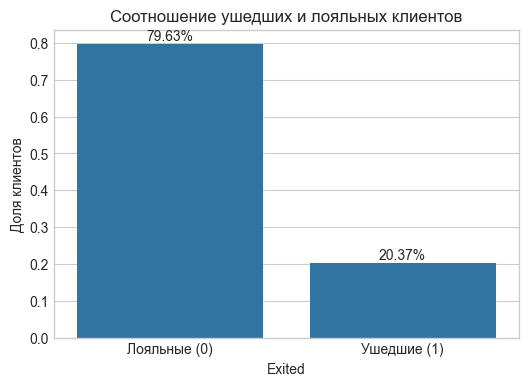

In [29]:
# 9.1 Соотношение ушедших и лояльных клиентов

exited_counts = churn_data["Exited"].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(
    x=exited_counts.index,
    y=exited_counts.values,
    ax=ax
);  

ax.set_xticks([0, 1])  #  задаем, где должны быть тики
ax.set_xticklabels(["Лояльные (0)", "Ушедшие (1)"])

ax.set_ylabel("Доля клиентов")
ax.set_title("Соотношение ушедших и лояльных клиентов")

for index, value in enumerate(exited_counts.values):
    ax.text(
        index,
        value + 0.01,
        f"{value:.2%}",
        ha="center"
    )

plt.show()



9.1 На диаграмме видно, что 79.63% клиентов остаются лояльными банку и 20.37% уходят. То есть отток есть, но основная часть клиентской базы сохраняется.

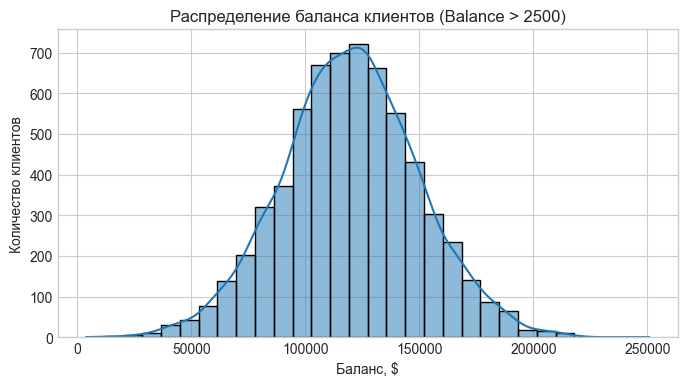

In [ ]:
# 9.2 Распределение баланса при Balance > 2500

filtered_balance = churn_data.loc[churn_data["Balance"] > 2500, "Balance"]

fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(
    filtered_balance,
    bins=30,
    kde=True,
    ax=ax
);

ax.set_xlabel("Баланс, $")
ax.set_ylabel("Количество клиентов")
ax.set_title("Распределение баланса клиентов (Balance > 2500)")

plt.show()


9.2 Распределение баланса клиентов с Balance > 2500 близко к нормальному: большинство значений сосредоточено примерно в районе 100-150 тыс.
Значения сильно меньше и сильно больше встречаются значительно реже, что говорит о концентрации клиентов в среднем диапазоне баланса.

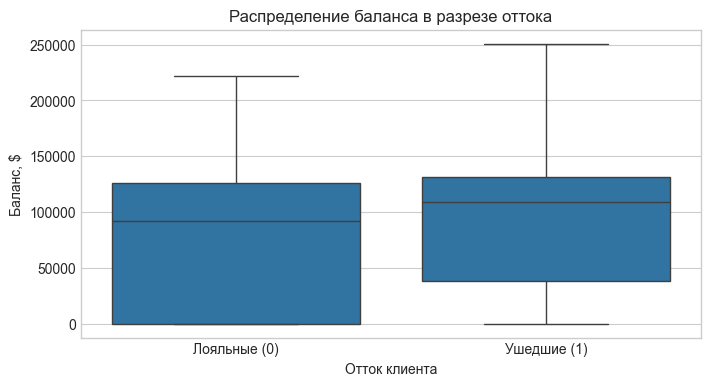

In [ ]:
#9.3 Распределение баланса в разрезе оттока


fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(
    data=churn_data,
    x="Exited",
    y="Balance",
    ax=ax
);

ax.set_xticks([0, 1])
ax.set_xticklabels(["Лояльные (0)", "Ушедшие (1)"])

ax.set_xlabel("Отток клиента")
ax.set_ylabel("Баланс, $")
ax.set_title("Распределение баланса в разрезе оттока")

plt.show()


9.3 У ушедших клиентов медианный баланс выше, чем у лояльных (примерно 110-115 тыс. против ~95 тыс.). Разброс баланса у ушедших также несколько больше. Это может означать, что клиенты с более крупными остатками на счёте чувствительнее к условиям банка и чаще принимают решение уйти к конкурентам.

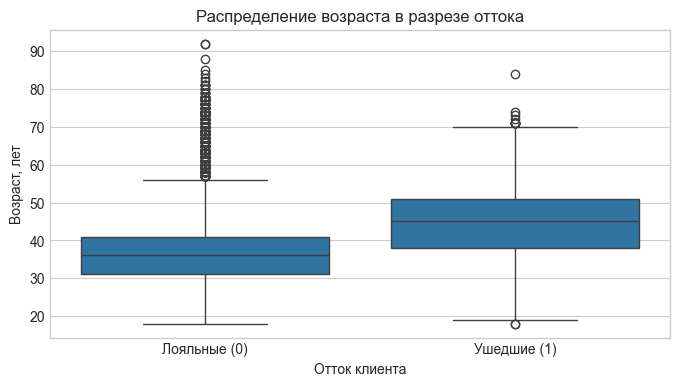

In [ ]:
#9.4 Возраст в разрезе оттока


fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(
    data=churn_data,
    x="Exited",
    y="Age",
    ax=ax
);

ax.set_xticks([0, 1])
ax.set_xticklabels(["Лояльные (0)", "Ушедшие (1)"])

ax.set_xlabel("Отток клиента")
ax.set_ylabel("Возраст, лет")
ax.set_title("Распределение возраста в разрезе оттока")

plt.show()


9.4 Диаграмма показывает, что ушедшие клиенты в среднем старше лояльных. Медианный возраст ушедших находится примерно в диапазоне 45-50 лет, тогда как медианный возраст лояльных — около 35-40 лет. Также для ушедших наблюдается больший разброс по возрасту. Это может означать, что риск оттока выше среди клиентов среднего и старшего возраста.

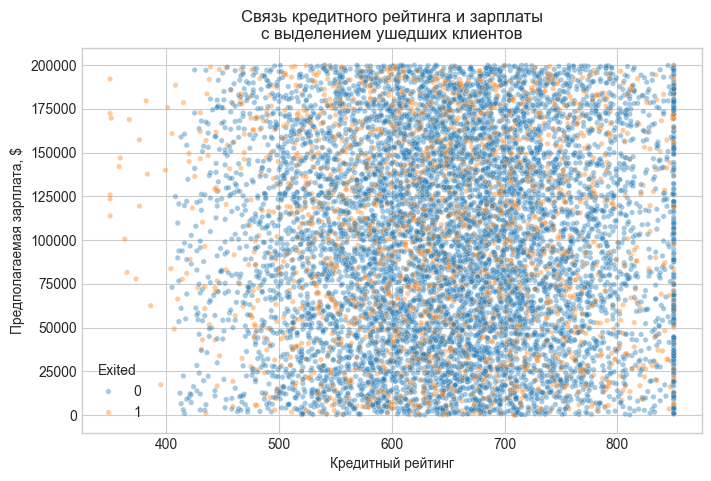

In [ ]:
#9.5 Связь CreditScore и EstimatedSalary


fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(
    data=churn_data,
    x="CreditScore",
    y="EstimatedSalary",
    hue="Exited",
    alpha=0.4,
    s=15,
    ax=ax
);

ax.set_xlabel("Кредитный рейтинг")
ax.set_ylabel("Предполагаемая зарплата, $")
ax.set_title(
    "Связь кредитного рейтинга и зарплаты\n"
    "с выделением ушедших клиентов"
)

plt.show()


9.5 Облако точек распределено довольно равномерно: явной зависимости между кредитным рейтингом и предполагаемой зарплатой не видно. Точки ушедших клиентов (оранжевые) визуально перемешаны с точками лояльных (синие) по всей плоскости. Это означает, что по сочетанию только двух признаков — CreditScore и EstimatedSalary - предсказать отток сложно

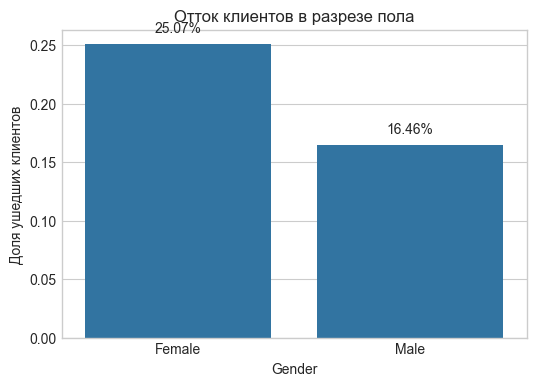

In [ ]:
#9.6 Отток в разрезе пола


gender_churn = (
    churn_data.groupby("Gender")["Exited"].mean().reset_index()
)

fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(
    data=gender_churn,
    x="Gender",
    y="Exited",
    ax=ax
);

ax.set_ylabel("Доля ушедших клиентов")
ax.set_title("Отток клиентов в разрезе пола")

for i, row in gender_churn.iterrows():
    ax.text(i, row["Exited"] + 0.01, f"{row['Exited']:.2%}", ha="center") # добавление подписей над столбцами

plt.show()


9.6 Женщины уходят из банка чаще, чем мужчины: доля ушедших среди женщин составляет 25.07%, среди мужчин - 16.46%. То есть риск оттока у клиенток примерно на 8.6 процентных пункта выше, чем у клиентов-мужчин.

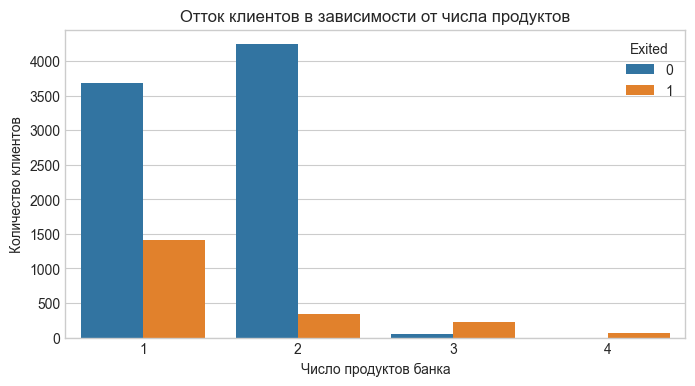

In [ ]:
#9.7 Отток в зависимости от числа продуктов (многоуровневая диаграмма)



fig, ax = plt.subplots(figsize=(8, 4))

sns.countplot(
    data=churn_data,
    x="NumOfProducts",
    hue="Exited",
    ax=ax
);

ax.set_xlabel("Число продуктов банка")
ax.set_ylabel("Количество клиентов")
ax.set_title("Отток клиентов в зависимости от числа продуктов")
ax.legend(title="Exited")

plt.show()


9.7 Наибольшая доля оттока наблюдается у клиентов, у которых 3-4 продукта банка: среди клиентов с 3 продуктами уходит ~82.71%, с 4 продуктами - ~100%. Среди клиентов с 1 и 2 продуктами отток существенно ниже: 27.71% и 7.58% соответственно. Это может означать, что слишком большая нагрузка продуктами приводит к неудовлетворённости и уходу, либо что иначе сегмент 3-4 продуктов сильно отличается от основной массы клиентов (например, по рисковому профилю).

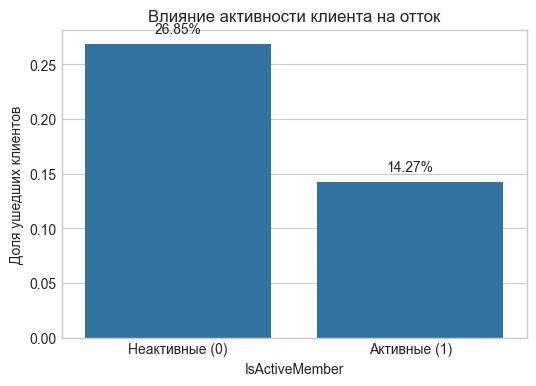

In [ ]:
#9.8 Влияние активности клиента



active_churn = (
    churn_data.groupby("IsActiveMember")["Exited"].mean().reset_index()
)

fig, ax = plt.subplots(figsize=(6, 4))

sns.barplot(
    data=active_churn,
    x="IsActiveMember",
    y="Exited",
    ax=ax
);

ax.set_xticks([0, 1])
ax.set_xticklabels(["Неактивные (0)", "Активные (1)"])

ax.set_ylabel("Доля ушедших клиентов")
ax.set_title("Влияние активности клиента на отток")

for i, row in active_churn.iterrows():
    ax.text(i, row["Exited"] + 0.01, f"{row['Exited']:.2%}", ha="center")

plt.show()


9.8 У неактивных клиентов доля оттока значительно выше: 26.85% против 14.27% у активных. Это говорит о том, что вовлечённость в продукты и сервисы банка связана с удержанием: неактивных клиентов имеет смысл стимулировать пользоваться услугами, чтобы снизить риск ухода.

In [ ]:
#9.9 Картограмма по странам (Plotly)

country_churn = (
    churn_data.groupby("Geography")["Exited"].mean().reset_index()
)

country_map = {
    "France": "FRA",
    "Germany": "DEU",
    "Spain": "ESP"
} # Для будущих версий библиотеки Plotly

country_churn["ISO3"] = country_churn["Geography"].map(country_map)

fig = px.choropleth(
    data_frame=country_churn,
    locations="ISO3",
    locationmode="ISO-3",
    color="Exited",
    color_continuous_scale="Reds",
    labels={"Exited": "Доля оттока"},
    title="Доля ушедших клиентов по странам"
)

fig.show()

9.9 Тепловая картограмма показывает различия в доле оттока по странам.
Наибольший процент ушедших клиентов наблюдается в Германии, затем в меньшей степени во Франции, и самая низкая доля - в Испании.
Это говорит о том, что географическое положение может быть значимым фактором оттока. Возможно, условия обслуживания или конкурентная среда на немецком рынке отличаются от других регионов.

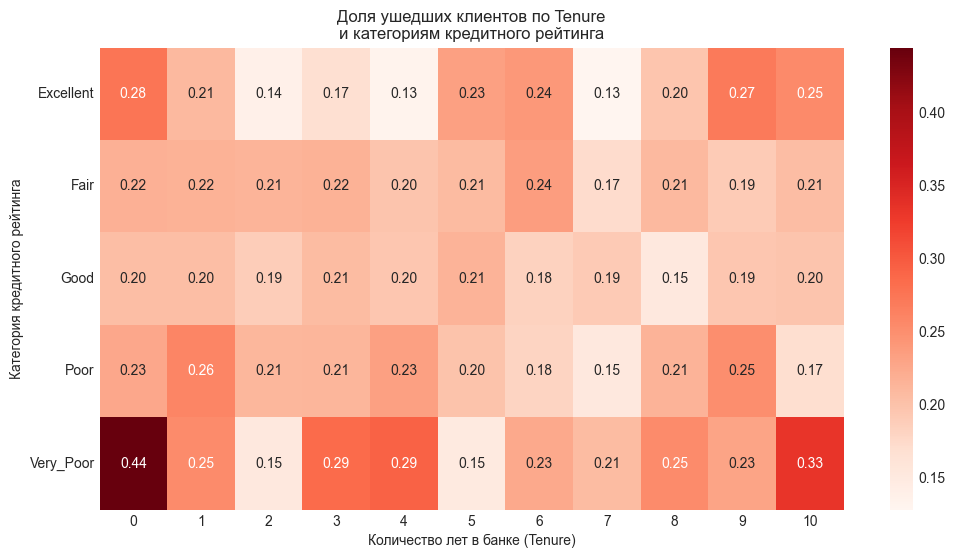

In [ ]:
# 9.10 Перевод CreditScore в категории + тепловая карта


def get_credit_score_cat(credit_score):
    """
    Преобразует числовой кредитный рейтинг в категорию.
    """
    
    if 300 <= credit_score < 500:
        return "Very_Poor"
    elif 500 <= credit_score < 601:
        return "Poor"
    elif 601 <= credit_score < 661:
        return "Fair"
    elif 661 <= credit_score < 781:
        return "Good"
    elif 781 <= credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    else:
        return "Deep"

churn_data["CreditScoreCat"] = churn_data["CreditScore"].apply(
    get_credit_score_cat
)

pivot_churn = pd.pivot_table(
    churn_data,
    index="CreditScoreCat",
    columns="Tenure",
    values="Exited",
    aggfunc="mean"
)

fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(
    pivot_churn,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    ax=ax
);

ax.set_xlabel("Количество лет в банке (Tenure)")
ax.set_ylabel("Категория кредитного рейтинга")
ax.set_title(
    "Доля ушедших клиентов по Tenure\n"
    "и категориям кредитного рейтинга"
)

plt.yticks(rotation=0)
plt.show()


9.10 Тепловая карта показывает, что доля оттока зависит от сочетания кредитного рейтинга и стажа клиента в банке.
Наиболее высокий риск ухода наблюдается у клиентов с низким кредитным рейтингом — категория Very_Poor, особенно при стаже 0-4 года (доля оттока достигает 29-44%).
Клиенты со средними и высокими рейтингами (Fair, Good, Excellent) более стабильны: значения оттока в этих категориях распределены равномерно и заметно ниже.
Таким образом, наиболее уязвимыми сегментами являются новые клиенты с низким кредитным рейтингом — именно на них стоит направлять программы удержания.